In [8]:
import pandas as pd
import matplotlib.pyplot as plt

Задание 1

Напишите функцию, которая классифицирует фильмы

In [4]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

In [5]:
def rating_classifier(data):
    if data['rating'] <= 2.0:
        return 'низкий рейтинг'
    elif data['rating'] <= 4.0:
        return 'средний рейтинг'
    elif data['rating'] == 4.5 or data['rating'] == 5.0:
        return 'высокий рейтинг'
    return 'Error'

movies_combined = ratings.merge(movies, on='movieId', how='left')[['title', 'rating']].groupby('title').mean()
movies_combined['class'] = movies_combined.apply(rating_classifier, axis=1)

movies_combined.sort_values('rating', ascending=False).head()

,rating,class
title,,
Ivan Vasilievich: Back to the Future (Ivan Vasilievich menyaet professiyu) (1973),5.0,высокий рейтинг
Alien Escape (1995),5.0,высокий рейтинг
Boiling Point (1993),5.0,высокий рейтинг
Bone Tomahawk (2015),5.0,высокий рейтинг
Borgman (2013),5.0,высокий рейтинг


Задание 2
Необходимо написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определенному региону. Т. е. если поисковый запрос содержит название города региона, то в столбце ‘region’ пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим ‘undefined’.

In [ ]:
keywords_list = pd.read_csv('keywords.csv')

def geo_classifier(data):
    geo_data = {
        'Центр':['москва', 'тула', 'ярославль'],
        'Северо-Запад': ['петербург', 'псков', 'мурманск'],
        'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
        }

    for substr in data['keyword'].split(' '):
        if substr in geo_data['Центр']:
            return 'Центр'
        elif substr in geo_data['Северо-Запад']:
            return 'Северо-Запад'
        elif substr in geo_data['Дальний Восток']:
            return 'Дальний Восток'
        return 'undefined'

keywords_list['region'] = keywords_list.apply(geo_classifier, axis=1)
print(keywords_list)

                       keyword     shows     region
0                           вк  64292779  undefined
1                одноклассники  63810309  undefined
2                        порно  41747114  undefined
3                         ютуб  39995567  undefined
4                    вконтакте  21014195  undefined
...                        ...       ...        ...
99995   эльдорадо старый оскол      3705  undefined
99996      frigate для firefox      3630  undefined
99997                   укрсиб      3630  undefined
99998  погода в ялте на неделю      3688  undefined
99999                     ггму      3630  undefined

[100000 rows x 3 columns]


Задание 3 (бонусное)

Есть мнение, что “раньше снимали настоящее кино, не то что сейчас”. Ваша задача проверить это утверждение, используя файлы с рейтингами фильмов из прошлого домашнего занятия (файл movies.csv и ratings.csv из базы grouplens.org.../movielens). Т. е. проверить верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

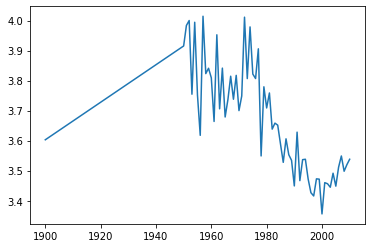

In [9]:
movies_merged = ratings.merge(movies, on='movieId', how='left')[['title', 'rating']]


def production_year(data):
    years = list(map(str, range(1950, 2011)))
    str_concat = data['title'][-5:-1]
    if str_concat in years:
        return int(str_concat)
    return 1900


movies_merged['year'] = movies_merged.apply(production_year, axis=1)

movies_merged[['year', 'rating']].groupby('year').mean().sort_values('rating', ascending=False)

plt.plot(movies_merged[['year', 'rating']].groupby('year').mean())

plt.show()


Вывод: с течением времени значения рейтинга фильмов имеют тенденцию к снижению. Данная тенденция имеет место до 2000 года, после которого отмечается некоторое повышение средних значений рейтинга.